<a href="https://colab.research.google.com/github/connectkishan1/BOSTON-Housing-Dataset-Prediction/blob/master/BOSTON_Housing_Dataset_Predn_Using_Dtree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,r2_score,mean_squared_error


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv("/content/drive/My Drive/PythonBoss/ML Project/Boston Dataset Predn using Linear regression/Boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data=df.iloc[:,[5,10,12]]
data.head(3)

,rm,ptratio,lstat
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03


In [5]:
target=df.iloc[:,[-1]]
target.head(3)

,medv
0,24.0
1,21.6
2,34.7


In [6]:
dtree_model=DecisionTreeRegressor()

In [7]:
x_train,x_test,y_train,y_test= train_test_split(data,target,test_size=0.2,random_state=1)

In [8]:
histy=dtree_model.fit(x_train,y_train)
print(histy)
dtree_model.score(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


1.0

In [9]:
dtree_model.score(x_test,y_test)

0.6750255903480894

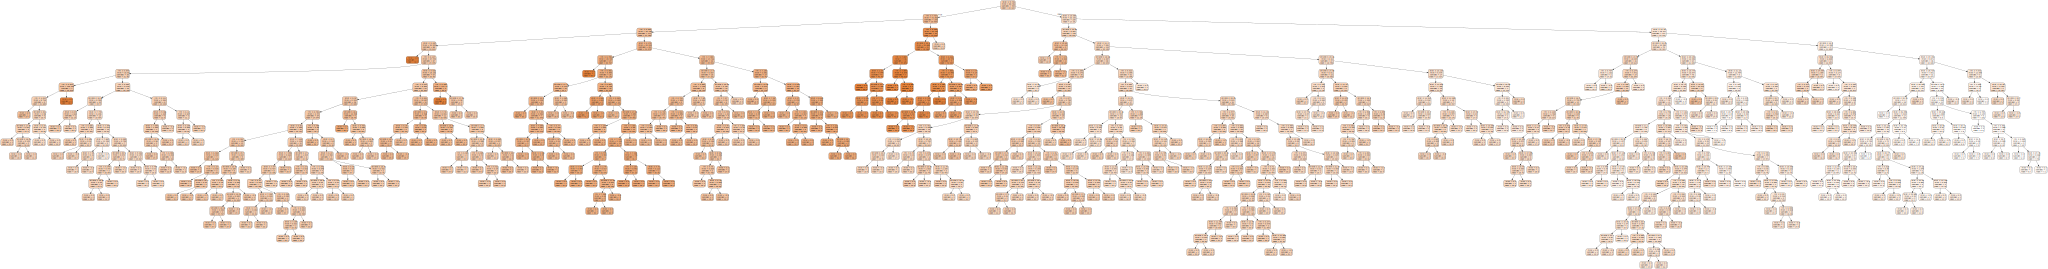

In [19]:
#plt.figure(figsize=(2,4))

import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(dtree_model, out_file=None, 
                      feature_names=data.columns,  
                      class_names=target.columns,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data,filename="kishan.gv",format="png",directory="/content/",encoding='utf-8')  
#plt.figure(figsize=(10,8))
graph

In [11]:
import pickle
pickle.dump(dtree_model,open('dtree_model1_for_Boston_DS.pk','wb'))

In [12]:
pre=pickle.load(open('/content/drive/My Drive/PythonBoss/ML Project/Boston Dataset Predn using Linear regression/dtree_model1_for_Boston_DS.pk','rb'))
res = pre.score(x_test, y_test)
print(res) #test size=20,random_state=1

0.8324995981327217


In [13]:
new=[[6.421,17.8,9.14]]
pre.predict(new)

array([21.6])